In [ ]:
# 텍스트 마이닝의 여러 기법들을 활용해서 리뷰 분석을 수행해보자
# - 0. 가상 리뷰 생성
# - 1. 빈도 분석
# - 2. 시각화 
#   - 2-1. 막대 그래프
#   - 2-2. 워드 클라우드 시각화
# - 3. 제품 만족도 수치화
#   - 3-1. 단순 사전 방식
#   - 3-2. 가중치와 복합 의미 방식

In [1]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs("이제 환경 세팅과 konlpy 연결까지 완벽하게 끝났다"))

['이제', '환경', '세팅', '과', 'konlpy', '연결', '까지', '완벽하게', '끝났다']


# 0. 가상 리뷰 생성

In [2]:
reviews = [
    "속건조가 심한 편인데 이 제품 쓰고 나서 얼굴 당김이 확실히 줄었어요.", "제형이 가볍고 산뜻해서 여름에 쓰기 정말 좋습니다.",
    "바르자마자 흡수되는 느낌이 들고 끈적임이 전혀 없어서 만족해요.", "향이 너무 강해서 민감하신 분들은 호불호가 갈릴 것 같네요.",
    "가성비 최고의 스킨로션입니다. 듬뿍듬뿍 발라도 부담 없어요.", "사용 후 피부 트러블이 올라와서 저랑은 잘 안 맞는 것 같습니다.",
    "보습력이 오래 유지돼서 아침에 바르면 저녁까지 촉촉해요.", "배송 중에 로션 펌프가 깨져서 왔어요. 교환 부탁드립니다.",
    "패키지 디자인이 심플하고 예뻐서 화장대 위에 두기 좋네요.", "유분기가 적당해서 지성 피부인 제가 쓰기에 딱 적당합니다.",
    "물 같은 제형이라 닦토용으로 쓰기에 아주 유용합니다.", "성분이 착해서 그런지 예민한 피부인데도 자극이 없어요.",
    "가격은 좀 비싼 편이지만 품질을 생각하면 재구매 의사 있습니다.", "로션이 약간 겉도는 느낌이 있어서 충분히 두드려줘야 해요.",
    "환절기만 되면 각질이 일어났는데 이 스킨 쓰고 많이 진정됐어요.", "사은품으로 준 샘플이 본품만큼 좋아서 기분이 좋네요.",
    "입구가 좁아서 내용물을 덜어낼 때 조금 불편함이 있습니다.", "남편 선물로 줬는데 끈적이지 않는다고 아주 좋아하며 잘 써요.",
    "피부 결이 정돈되는 느낌이라 화장이 훨씬 잘 먹는 것 같아요.", "대용량 버전도 나왔으면 좋겠어요. 금방 다 써버리네요.",
    "쿨링감이 있어서 홍조 기운 있는 볼에 바르면 진정 효과가 커요.", "배송은 빨랐는데 박스 포장이 너무 허술해서 아쉬웠습니다.",
    "속보습은 잘 채워주는데 겉은 보송하게 마무리돼서 신기해요.", "유통기한이 넉넉한 제품으로 보내주셔서 안심하고 사용합니다.",
    "스킨이랑 로션 같이 쓰니까 시너지 효과가 확실히 있는 것 같아요.", "제 피부에는 수분감이 조금 부족한 것 같아 크림을 덧발라야 해요.",
    "향료가 들어가지 않은 무향이라 오히려 더 깔끔하고 좋았습니다.", "피부 장벽이 튼튼해지는 기분이라 꾸준히 사용해 볼 예정입니다.",
    "펌핑형이라 위생적으로 사용할 수 있는 점이 마음에 듭니다.", "인생 스킨케어 제품 찾았어요! 단종되지 말고 계속 팔아주세요.",
    "오프라인 매장보다 저렴하게 잘 샀습니다. 배송도 만족해요.", "바르고 나면 피부에서 광채가 나서 안색이 좋아 보입니다.",
    "여드름성 피부인데 자극 없이 순하게 잘 스며들어서 다행이에요.", "로션 텍스처가 너무 묽어서 양 조절하기가 약간 힘드네요.",
    "미백 효과는 잘 모르겠지만 수분 충전 하나는 확실합니다.", "겨울에 쓰기엔 조금 가벼운 느낌이라 오일을 섞어 써야겠어요.",
    "친구 추천으로 샀는데 왜 이제야 샀나 싶을 정도로 좋아요.", "성분 분석 어플에서 유해 성분 제로라고 해서 믿고 샀습니다.",
    "한 달 사용해 보니 확실히 피부 톤이 맑아진 게 느껴집니다.", "세안 후 바로 바르면 당김이 즉각적으로 사라져서 필템이에요.",
    "통이 유리라서 좀 무겁긴 하지만 환경을 생각하면 나쁘지 않네요.", "흡수 속도가 광속이에요. 바쁜 아침에 사용하기 최고입니다.",
    "끈적거리는 거 싫어하는 남자분들에게 적극 추천하는 로션입니다.", "원플러스원 행사할 때 쟁여뒀는데 아주 든든합니다.",
    "피부 속까지 수분이 꽉 차는 느낌이라 건조함이 사라졌어요.", "제품 상자에 인쇄된 글씨가 너무 작아서 읽기 힘들어요.",
    "자극적인 성분이 없어서 아이랑 같이 써도 문제없을 것 같아요.", "용기가 투명해서 잔량을 확인할 수 있다는 점이 편리해요.",
    "기대했던 것보다 수분 지속력이 짧아서 조금 실망했습니다.", "전체적으로 순하고 무난해서 데일리 아이템으로 딱입니다."
]

# 50개의 리뷰를 하나의 문자열로 결합
total_str = " ".join(reviews)

# 결과 확인
print(f"데이터 개수: {len(reviews)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

데이터 개수: 50개
통합 문자열 길이: 1675자


# 1. 단순 빈도

In [4]:
from konlpy.tag import Okt
from collections import Counter

In [5]:
# 형태소 분석기 초기화
okt = Okt()

# 1. 명사 추출 및 2글자 이상인 단어만 필터링
nouns = okt.nouns(total_str)
words = [n for n in nouns if len(n) > 1]

# 2. 단어 빈도 계산
count = Counter(words)
top_10 = count.most_common(10)

print("----- 빈출 단어 TOP 10 -----")
for word, freq in top_10:
    print(f"{word}: {freq}회")

----- 빈출 단어 TOP 10 -----
피부: 10회
사용: 6회
느낌: 5회
로션: 5회
제품: 4회
쓰기: 4회
성분: 4회
조금: 4회
수분: 4회
배송: 3회


# 2. 시각화

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 설정 (환경에 따라 경로 수정이 필요할 수 있습니다)
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기준

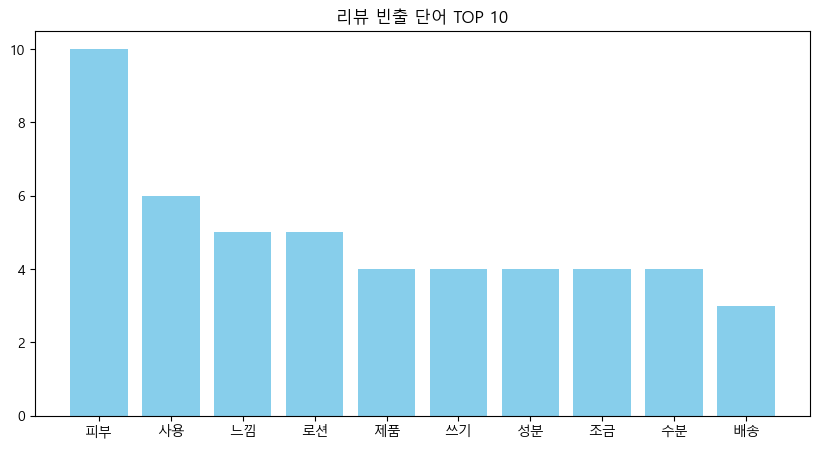

In [8]:
# 2. 빈출 단어 시각화 (막대 그래프)
words_only = [x[0] for x in top_10]
counts_only = [x[1] for x in top_10]

plt.figure(figsize=(10, 5))
plt.bar(words_only, counts_only, color='skyblue')
plt.title('리뷰 빈출 단어 TOP 10')
plt.show()

### 2-2. 워드 클라우드

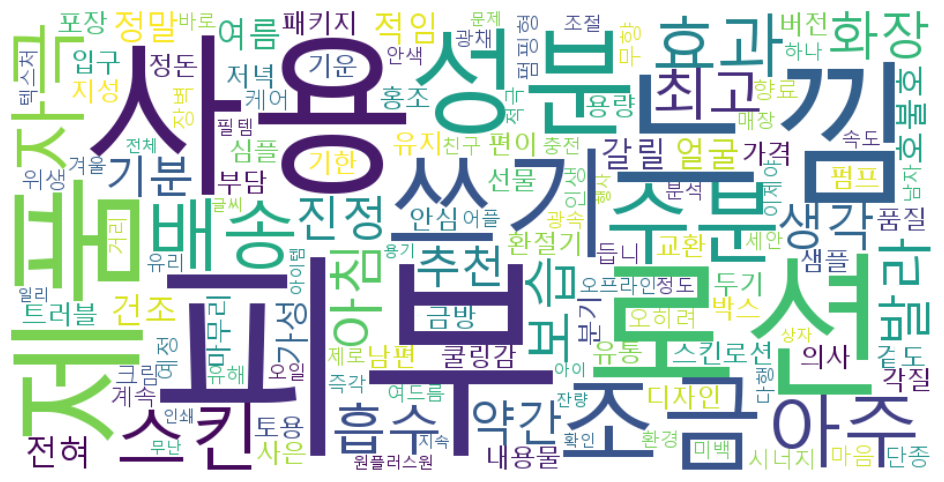

In [9]:
# 3. 워드 클라우드 생성
wc = WordCloud(
    font_path='malgun', # 윈도우 폰트 이름
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(count)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. 제품 만족도 수치화

In [ ]:
# 전문적인 모델 없이도, 긍정/부정 키워드가 포함된 문장 수를 계산하여 만족도를 점수화할 수 있습니다.

In [10]:
# 긍정/부정 단어 정의 (리뷰 데이터 기반)
pos_keywords = ['좋아요', '만족', '추천', '최고', '촉촉', '산뜻', '감사', '편해', '순해']
neg_keywords = ['아쉽', '실망', '불편', '부족', '비싼', '부실', '트러블', '깨져']

pos_score = 0
neg_score = 0

for review in reviews: # 이전 단계에서 만든 50개 리스트 활용
    for p in pos_keywords:
        if p in review:
            pos_score += 1
            break # 한 문장에 긍정어가 여러 개 있어도 1번만 카운트
    for n in neg_keywords:
        if n in review:
            neg_score += 1
            break

# 만족도 계산 (긍정 리뷰 비율)
satisfaction_rate = (pos_score / len(reviews)) * 100

print(f"----- 만족도 분석 결과 -----")
print(f"긍정 리뷰 추정: {pos_score}건")
print(f"부정 리뷰 추정: {neg_score}건")
print(f"최종 제품 만족도: {satisfaction_rate:.1f}%")

----- 만족도 분석 결과 -----
긍정 리뷰 추정: 8건
부정 리뷰 추정: 6건
최종 제품 만족도: 16.0%



## 3-2. 제품 만족도 수치화 - 가중치와 복합 의미 방식

In [13]:
# 정밀 감성 사전 (Sentiment Lexicon)
sentiment_dict = {
    # 긍정 (Positive)
    '최고': 2.0, '추천': 1.5, '만족': 1.5, '인생템': 2.0, '완벽': 2.0,
    '촉촉': 1.0, '산뜻': 1.0, '순해': 1.0, '흡수': 1.0, '진정': 1.0,
    '좋아요': 1.0, '좋네요': 1.0, '빠름': 0.8, '감사': 0.8, '무난': 0.3,
    
    # 부정 (Negative)
    '실망': -2.0, '최악': -2.5, '불량': -2.0, '고장': -2.0, '트러블': -2.0,
    '아쉽': -0.8, '비싸': -1.0, '불편': -1.2, '부족': -1.0, '부실': -1.2,
    '따가': -1.5, '끈적': -0.8, '무겁': -0.5, '밀려': -0.8, '답답': -1.0
}

# 부정 표현 (Inverter) - 긍정어의 의미

#를 반전시킴
negators = ['안 ', '못 ', '전혀 ', '별로 ', '않고', '아니']

In [14]:
def calculate_sentiment_score(review_list, s_dict, n_list):
    total_score = 0
    review_results = []

    for review in review_list:
        score = 0
        # 1. 감성 사전 매칭
        for word, value in s_dict.items():
            if word in review:
                # 2. 부정 표현(Inverter) 체크: "안 좋아요" 등을 처리
                is_negated = False
                for neg in n_list:
                    if neg in review and review.find(neg) < review.find(word):
                        is_negated = True
                        break
                
                if is_negated:
                    score -= (value * 0.8)  # 긍정어 점수를 깎고 부정으로 반전
                else:
                    score += value
        
        # 문장별 최종 점수 기록 (0보다 크면 긍정, 작으면 부정)
        review_results.append(score)
        total_score += score

    # 3. 정규화 (0~100점 사이로 환산)
    # 단순 평균 점수를 기반으로 한 만족도 지수 산출
    avg_score = total_score / len(review_list)
    # -2.0~2.0 범위를 0~100으로 스케일링 (min-max normalization 유사)
    satisfaction_index = (avg_score + 2) / 4 * 100 
    
    return satisfaction_index, review_results

# 실행
score_index, results = calculate_sentiment_score(reviews, sentiment_dict, negators)

print(f"----- 정밀 분석 결과 -----")
print(f"분석 대상 리뷰: {len(reviews)}건")
print(f"평균 감성 점수: {sum(results)/len(results):.2f}")
print(f"최종 제품 만족도 지수: {score_index:.1f} / 100")

----- 정밀 분석 결과 -----
분석 대상 리뷰: 50건
평균 감성 점수: 0.15
최종 제품 만족도 지수: 53.8 / 100


# 4. 고급 텍스트 마이닝

## 속성별 분석 (Aspect-based Sentiment Analysis)

In [ ]:
# 리뷰 전체의 점수가 아니라 배송, 가격, 품질 등 특정 속성(Aspect)별로 점수를 따로 매기는 방식. 
# 키워드 매칭과 윈도우 슬라이싱(주변부 탐색) 기법을 사용

In [16]:
print(sentiment_dict)

{'최고': 2.0, '추천': 1.5, '만족': 1.5, '인생템': 2.0, '완벽': 2.0, '촉촉': 1.0, '산뜻': 1.0, '순해': 1.0, '흡수': 1.0, '진정': 1.0, '좋아요': 1.0, '좋네요': 1.0, '빠름': 0.8, '감사': 0.8, '무난': 0.3, '실망': -2.0, '최악': -2.5, '불량': -2.0, '고장': -2.0, '트러블': -2.0, '아쉽': -0.8, '비싸': -1.0, '불편': -1.2, '부족': -1.0, '부실': -1.2, '따가': -1.5, '끈적': -0.8, '무겁': -0.5, '밀려': -0.8, '답답': -1.0}


In [19]:
import numpy as np

In [20]:
def aspect_sentiment_analysis(reviews, aspect_keywords, sentiment_dict):
    aspect_scores = []
    for review in reviews:
        # 1. 속성 키워드가 문장에 있는지 확인
        if any(keyword in review for keyword in aspect_keywords):
            score = 0
            # 2. 해당 문장 내의 감성 단어 점수만 합산
            for word, val in sentiment_dict.items():
                if word in review:
                    score += val
            aspect_scores.append(score)
    
    return np.mean(aspect_scores) if aspect_scores else 0

delivery_score = aspect_sentiment_analysis(reviews, ['배송', '택배', '배송비'], sentiment_dict)
effect_score = aspect_sentiment_analysis(reviews, ['촉촉', '수분', '흡수'], sentiment_dict)

print(f"배송 만족도: {delivery_score:.2f}")
print(f"효능 만족도: {effect_score:.2f}")

배송 만족도: 0.50
효능 만족도: 0.39


## 토픽 모델링 (LDA: Latent Dirichlet Allocation)

In [ ]:
# pip install scikit-learn pyldavis

In [ ]:
# 수많은 리뷰 속에 숨겨진 '주제(Topic)'들을 확률적으로 찾아내는 기법입니다. 
# 예를 들어 "이 리뷰 그룹은 '배송'에 대해 말하고 있고, 저 그룹은 '성분'에 대해 말하고 있다"는 것을 기계가 스스로 분류합니다.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. 문서-단어 행렬 생성
cv = CountVectorizer(max_df=0.95, min_df=2)
# 전처리된 nouns 리스트를 공백으로 합친 리스트가 필요함
review_docs = [" ".join(okt.nouns(r)) for r in reviews]
dtm = cv.fit_transform(review_docs)

# 2. LDA 모델 학습 (토픽 개수를 3개로 설정)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# 3. 토픽별 주요 단어 출력
words = cv.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i+1}:")
    print([words[index] for index in topic.argsort()[-5:]]) # 상위 5개 단어

Topic #1:
['생각', '조금', '배송', '아주', '쓰기']
Topic #2:
['자극', '제품', '성분', '사용', '피부']
Topic #3:
['피부', '효과', '느낌', '로션', '수분']


## 토픽 모델링 시각화

In [ ]:
# 1. 토픽별 상세 해석

# 토픽 번호	주요 키워드	                   해석 (Topic Labeling)	분석 결과의 의미
# Topic #1	배송, 아주, 조금, 쓰기, 생각	   구매 경험 및 편의성	   제품 자체의 성능보다는 배송 속도, 포장 상태, 전반적인 사용 편의성에 대한 사용자들의 경험이 뭉쳐 있는 토픽입니다. '조금', '아주' 같은 부사가 섞인 것으로 보아 만족/불만족의 정도가 표현된 문장들입니다.
# Topic #2	피부, 사용, 성분, 제품, 자극	   성분 안전성 및 적합성	   피부에 직접 닿는 제품인 만큼 민감도, 자극 유무, 성분 구성을 중요하게 생각하는 집단의 목소리입니다. "성분이 순해서 자극이 없다" 혹은 "특정 성분이 피부에 맞는다"는 맥락의 리뷰가 많았음을 시사합니다.
# Topic #3	수분, 로션, 느낌, 효과, 피부	   제품 효능 및 보습력	   이 제품의 본질인 '수분 충전'과 '사용 후 체감 효과'에 집중된 토픽입니다. 피부에 느껴지는 촉촉함이나 수분 지속력 등 효능에 대한 직접적인 피드백이 이 그룹에 속합니다.

In [ ]:
# 2. 분석 결과의 비즈니스 인사이트

# 이 해석을 바탕으로 다음과 같은 인사이트를 도출할 수 있습니다.
# 마케팅 포인트: 소비자들은 '성분(Topic 2)'과 '효능(Topic 3)'을 분리해서 인식하고 있습니다. 상세 페이지에서 "무자극 성분(2)"과 "강력한 수분 효과(3)"를 구분하여 강조하는 전략이 유효합니다.
# 개선점 발견: Topic #1에서 '조금', '생각' 등의 단어가 배송과 엮여 있다면, "생각보다 배송이 조금 느리다" 혹은 "생각보다 양이 조금 적다"와 같은 기대치 대비 아쉬움이 존재하는지 원문을 대조해 볼 필요가 있습니다.

In [ ]:
#(참고) 토픽 모델링 시각화

In [ ]:
# # 설치: pip install pyldavis pyLDAvis.sklearn
# import pyLDAvis
# import pyLDAvis.sklearn

# # LDA 모델과 데이터를 시각화 도구에 연결
# panel = pyLDAvis.sklearn.prepare(lda, dtm, cv, mds='tsne')

# # 주피터 노트북 내에 출력하거나 HTML 파일로 저장
# pyLDAvis.display(panel)
# # pyLDAvis.save_html(panel, 'lda_vis.html')